In [21]:
pip install hmmlearn


Note: you may need to restart the kernel to use updated packages.


In [72]:
import yfinance as yf
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt


In [73]:
# Fetch historical stock prices
ticker = "BLK"
start_date = "2023-12-31"
end_date = "2024-01-31"

data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [74]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,804.150024,808.140015,795.429993,800.299988,800.299988,660000
2024-01-03,792.409973,792.409973,782.330017,784.150024,784.150024,638700
2024-01-04,783.260010,792.489990,782.729980,785.950012,785.950012,580200
2024-01-05,782.809998,788.760010,781.460022,782.830017,782.830017,471000
2024-01-08,784.429993,798.010010,782.909973,797.190002,797.190002,513200
2024-01-09,792.650024,795.140015,787.140015,794.520020,794.520020,454700
2024-01-10,794.890015,799.049988,787.869995,792.359985,792.359985,510800
2024-01-11,796.960022,799.979980,787.080017,792.609985,792.609985,735800
2024-01-12,785.000000,802.340027,782.760010,799.599976,799.599976,880500


In [75]:
# Define observations (e.g., daily returns)
observations = np.diff(np.log(data['Close'].values))

# Convert to 2D array as required by hmmlearn
observations = observations.reshape(-1, 1)

In [76]:
# Define the Hidden Markov Model
n_components = 3  # Number of hidden states (you can adjust this based on your problem)
model = hmm.GaussianHMM(n_components=n_components, covariance_type="full")


In [77]:
# Fit the model to the data
model.fit(observations)

# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations)

Model is not converging.  Current: 35.776589535871835 is not greater than 38.37532254130381. Delta is -2.598733005431974


In [78]:
hidden_states

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

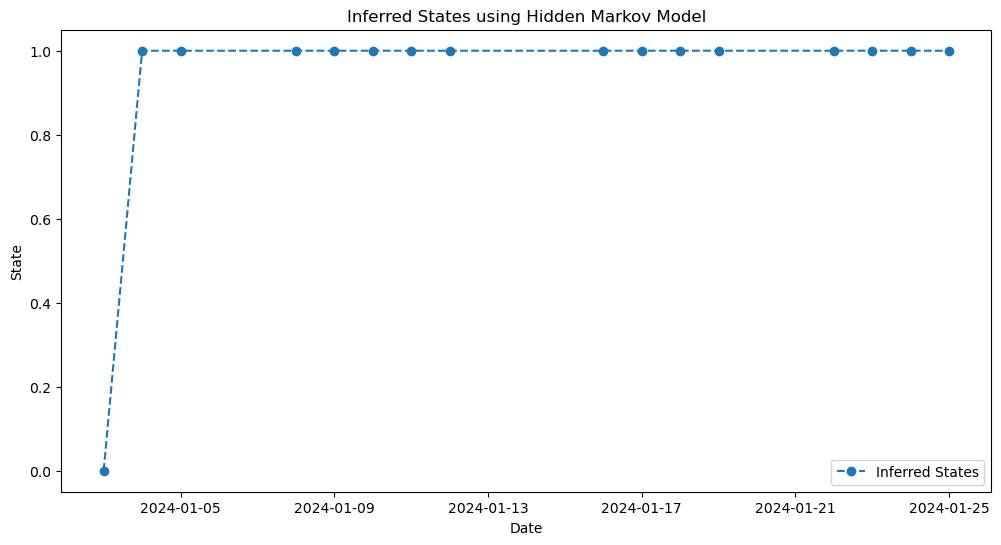

In [79]:
# Visualize the results
plt.figure(figsize=(12, 6))

plt.plot(data.index[1:], hidden_states, label='Inferred States', linestyle='dashed', marker='o')
plt.title('Inferred States using Hidden Markov Model')
plt.xlabel('Date')
plt.ylabel('State')
plt.legend()
plt.show()

In [80]:
import statsmodels.api as sm

In [81]:
# Create state-space model
model = sm.tsa.statespace.SARIMAX(data['Close'], order=(1, 0, 1), seasonal_order=(0, 0, 0, 0),
                                  measurement_error=True)

C:\Users\akram\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akram\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [82]:
results = model.fit(disp=False)

C:\Users\akram\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\akram\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [83]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   17
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -61.212
Date:                Thu, 25 Jan 2024   AIC                            130.424
Time:                        22:52:05   BIC                            133.757
Sample:                             0   HQIC                           130.755
                                 - 17                                         
Covariance Type:                  opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ar.L1                     1.0000   2.89e-06   3.46e+05      0.000       1.000       1.000
ma.L1                     0.9993      0.023     43.250      0.000       0.954       1.045
var.meas

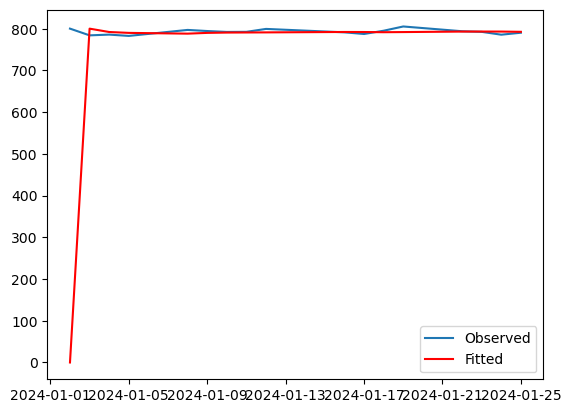

In [84]:
plt.plot(data.index, data['Close'], label='Observed')
plt.plot(data.index, results.fittedvalues, label='Fitted', color='red')
plt.legend()
plt.show()